# Mobile Price Classification

<h1>Table of Content<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item"><li><span><a href="#A_presentation of_the problem" data-toc-modified-id="A_presentation_of_the_problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A_presentation_of_the_problem</a></span>
        <ul class="toc-item"><li><span><a href="#Load_Data" data-toc-modified-id="Load_Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load_Data</a></span></li>
            <li><span><a href="#Data_Analysis" data-toc-modified-id="Data_Analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data_Analysis</a></span></li>
            <li><span><a href="#Feature_Importance" data-toc-modified-id="Feature_Importance-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Feature_Importance</a></span></li>
            <li><span><a href="#PCA" data-toc-modified-id="PCA-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>PCA</a></span></li></ul></li>
        <li><span><a href="#A presentation of 5 challenger models" data-toc-modified-id="A presentation of 5 challenger models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>A presentation of 5 challenger models</a></span>
            <ul class="toc-item">
                <li><span><a href="#Benchmark_Logistic_Regression_Model" data-toc-modified-id="Benchmark_Logistic_Regression_Model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Benchmark_Logistic_Regression_Model</a></span></li>
                <li><span><a href="#Criteria" data-toc-modified-id="Criteria-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Criteria</a></span></li>
                <li><span><a href="#KNN" data-toc-modified-id="KNN-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>KNN</a></span></li></ul></li></ul></div>

# A_presentation_of_the_problem

Price is the most effective attribute of marketing and business. The very first question of consumer is about the price of items. Mobile nowadays is one of the most selling and purchasing devices. So here the mobile price classification is a case study for a given type of problem. 
#### AIM:
* In this Project,On the basis of the mobile Specifications like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc., we are classifying the Prices of the mobile phones


* In this data:
    * id:ID
    * battery_power:Total energy a battery can store in one time measured in mAh
    * blue:Has bluetooth or not
    * clock_speed:speed at which microprocessor executes instructions
    * dual_sim:Has dual sim support or not
    * fc:Front Camera mega pixels
    * four_g:Has 4G or not
    * int_memory:Internal Memory in Gigabytes
    * m_dep:Mobile Depth in cm
    * mobile_wt:Weight of mobile phone
    * n_cores:Number of cores of processor
    * pc:Primary Camera mega pixels
    * px_height:Pixel Resolution Height
    * px_width:Pixel Resolution Width
    * ram:Random Access Memory in Megabytes
    * sc_h:Screen Height of mobile in cm
    * sc_w:Screen Width of mobile in cm
    * talk_time:longest time that a single battery charge will last when you are talking
    * three_g:Has 3G or not
    * touch_screen:Has touch screen or not
    * wifi:Has wifi or not

So we use above-mentioned features to classify whether the mobile would be *very economical, *economical, and *expensive or *very_ expensive. 

#### USE:

Based on the accuracy, the appropriate algorithm has been used to classify the prices of the mobile phones.This not only helps the customers decide the right phone to purchase, it also helps the owners decide what should be the appropriate pricing of the phone for the features that they offer. This idea of classifying the price will help the people make informed choice when they are purchasing a phone in the future.

##### Applied Models:

* Logistic Regression
* KNN

## Load_Data

In [1]:
#pip install sns

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
dataset=pd.read_csv('train.csv')

In [42]:
test=pd.read_csv('test.csv')

In [51]:
dataset.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [6]:
print(dataset.columns)
print(test.columns)


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')
Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


## Data_Analysis

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Our target column is price range from train data. this column has 4 unique values, 0 for low cost mobile phone, 1 for medium cost mobile phone. 2 for high cost and 3 for very high cost. 

In [8]:
dataset['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [9]:
dataset.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [10]:
# 0 for low cost
# 1 for medium cost
# 2 for high cost
# 3 for very high cost

These are evenly distributed:
#blue:Has bluetooth or not
#dual_sim:Has dual sim support or not
#four_g:Has 4G or not

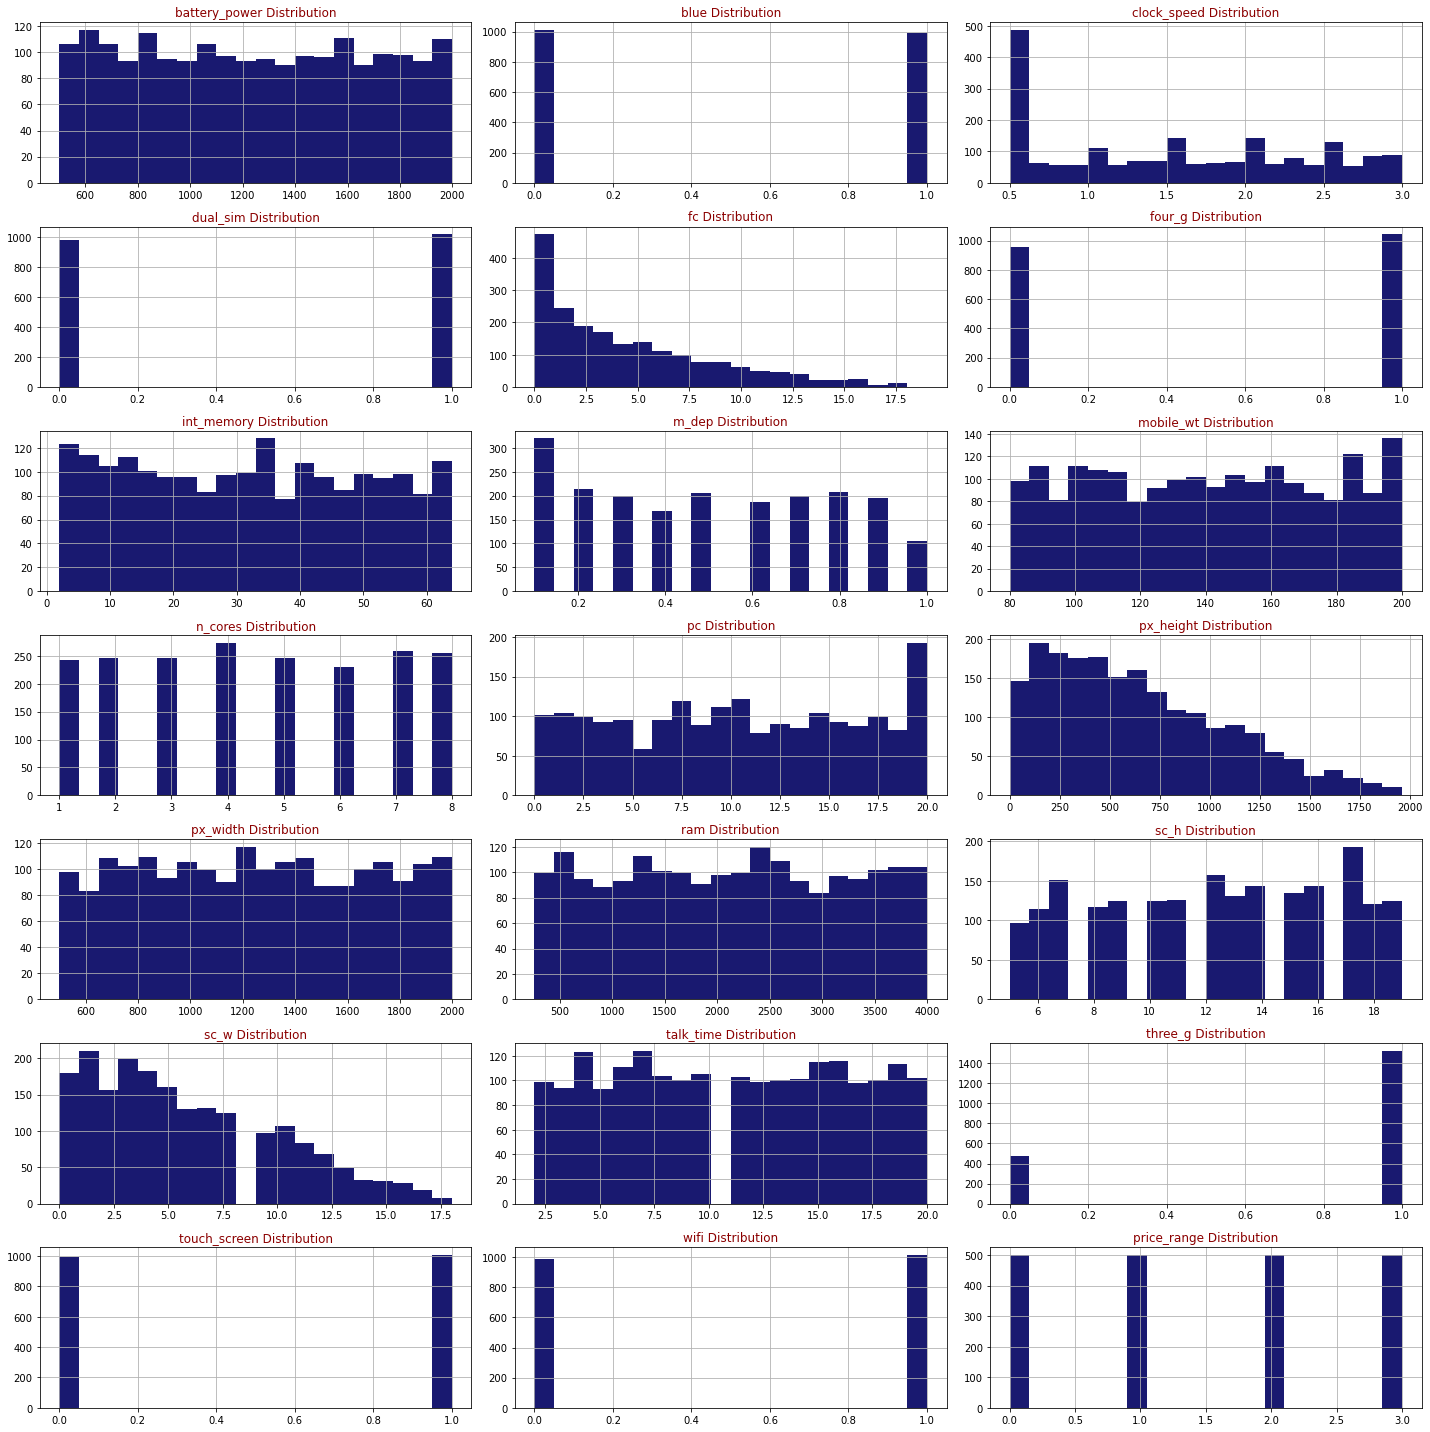

In [11]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(dataset,dataset.columns,7,3)

# Feature Selection

We decided to tackle the problem of identifying the important features from a set of given data and removing the irrelevant or less important features which do not contribute much to our decision making in order to achieve better accuracy for our model.

We aim that the feature selection will:
* reduce model complexity by dropping some irrelevant features.
* help ML algorithm to train a model faster.
* reduce dimensionality in order to avoid overfitting.


## Correlation Matrix

* Correlation will state how the features are related to each other or the target variable.


Text(0.5, 1.0, 'Correlation Matrix')

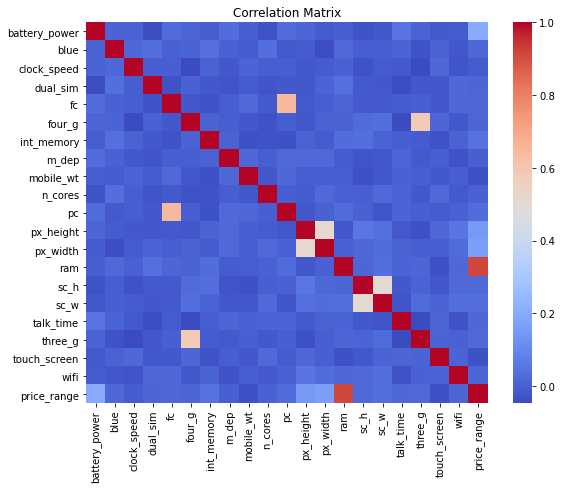

In [12]:
plt.figure(figsize=(9,7))
sns.heatmap(dataset.corr(),cmap='coolwarm')

plt.title('Correlation Matrix')

Let's make things more visible

In [13]:
# Most important features
#get correlations of each features in dataset
corrmat = dataset.corr()
important_feature1 = corrmat['price_range'].sort_values(ascending=False).head(10).to_frame()
important_feature1.head(5)

price_range
price_range       1.000000
ram               0.917046
battery_power     0.200723
px_width          0.165818
px_height         0.148858

### From above correlation plot we conclude that the feature 'price_range' and 'ram' are highly correlated(0.92) features which can also be related with the present situation. As ram of  mobile phone increases, the price also gets higher. 

### visuals for comparing the correlation of ram and battery with price ranges

Text(0.5, 1.0, 'Correlation with battery')

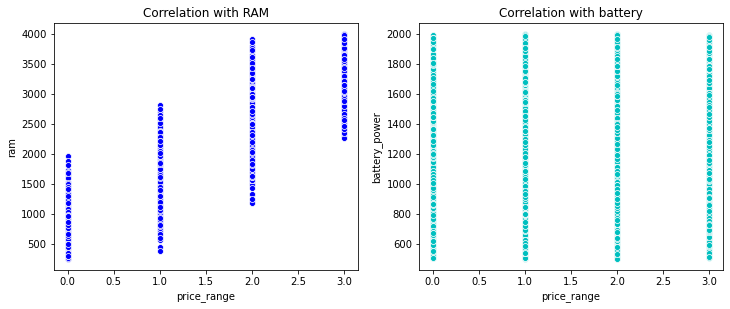

In [27]:
f = plt.figure(figsize=(12,10))

# correlation with ram
ax = f.add_subplot(2,2,1)
ax = sns.scatterplot(x="price_range", y="ram", color='b', data=dataset)
ax.set_title('Correlation with RAM')

# correlaion with Battery
ax = f.add_subplot(2,2,2)
ax = sns.scatterplot(x="price_range", y="battery_power", color='c', data=dataset)
ax.set_title('Correlation with battery')

## Data Visualization

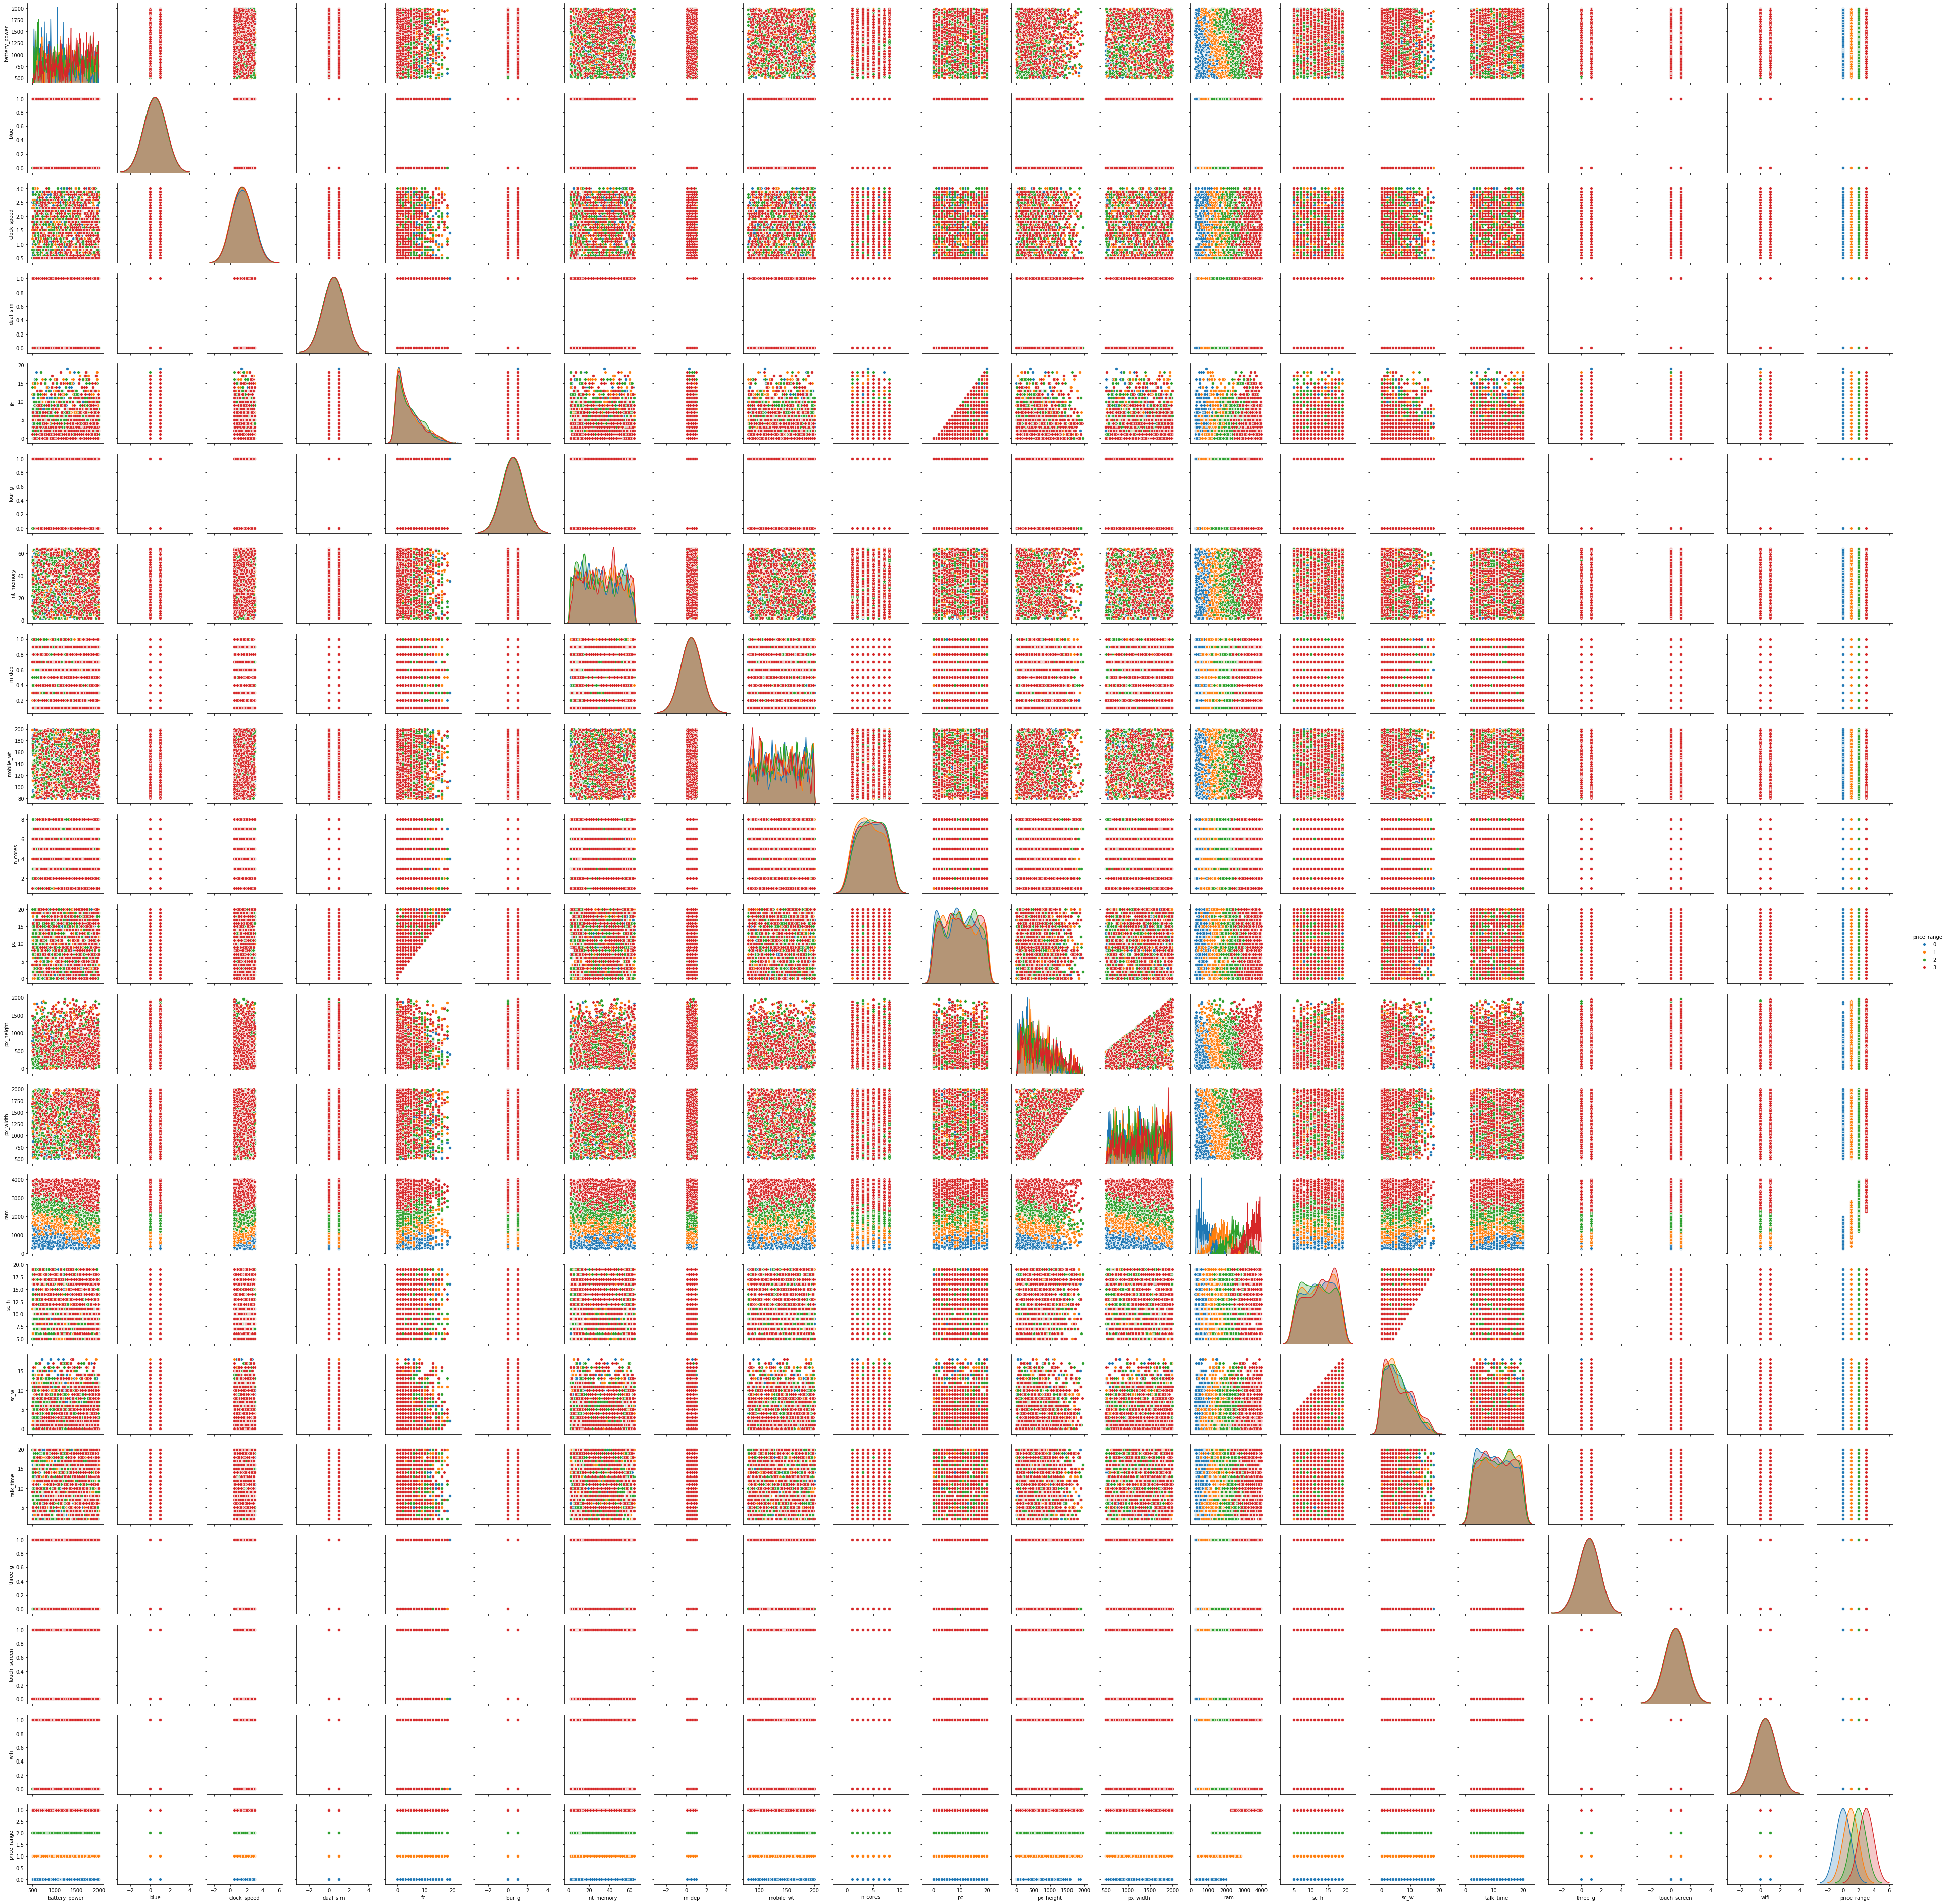

In [29]:
sns.pairplot(dataset,hue='price_range',diag_kws={'bw': 1})
plt.show(sns)

### How does ram is affected by price

#### The price of the phone increases when the size of its RAM is high, so we notice a positive correlation between the price of the phone and the size of its Ram.



In [ ]:
#this jointplot displays a relationship between ram and price range
#kind='kde' plots a kernel density estimate in the margins and converts the interior into a shaded countour plot

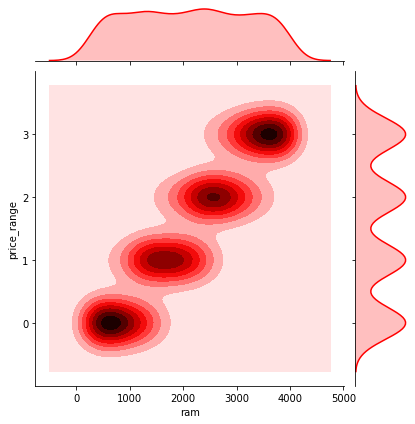

In [30]:
sns.jointplot(x='ram',y='price_range',data=dataset,color='red',kind='kde');

### Internal Memory vs Price Range

#### Visualizing real data over categorical data
##### Distribution of  internal memory in all price ranges 
mean of int_memory at price category - 0 is 31, mean of int_memory at price category- 1 is 32, mean of int_memory at price category 2 is slightly above 30, mean of int_memory at price category 3 is approximately 33.5 and 95% confidence intervals calculated using bootstrapping  

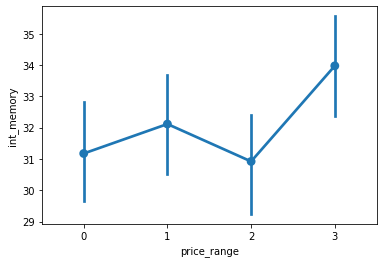

In [31]:
sns.pointplot(y="int_memory", x="price_range", data=dataset)

### % of Phones which support 3G

In [28]:
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values

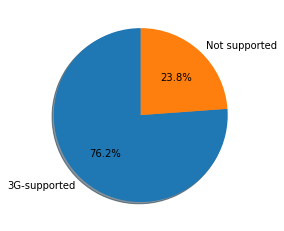

In [29]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()


### % of Phones which support 4G


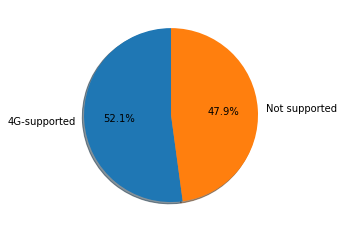

In [30]:
labels4g = ["4G-supported",'Not supported']
values4g = dataset['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

### Battery power vs Price Range

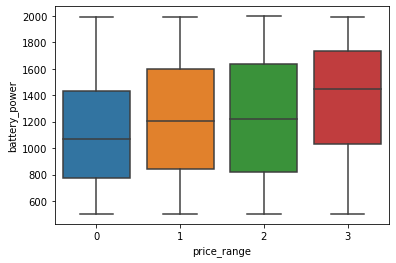

In [31]:
sns.boxplot(x="price_range", y="battery_power", data=dataset)

### No of Phones vs Camera megapixels of front and primary camera

Text(0.5, 0, 'MegaPixels')

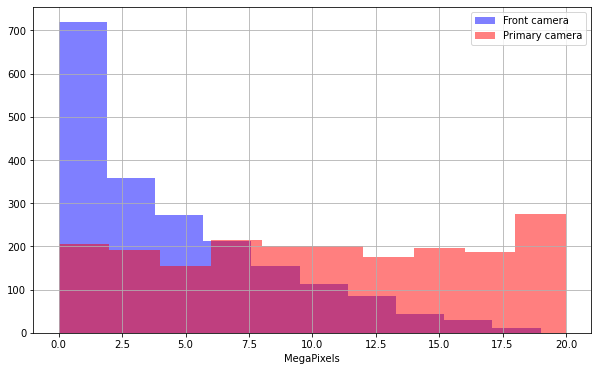

In [32]:
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

### Mobile Weight vs Price range

In [17]:
#this jointplot displays a relationship between weight of mobile phone and price range
#kind='kde' plots a kernel density estimate in the margins and converts the interior into a shaded countour plot
#the plot is close to flat because we our variables are uncorrelated, as it was given in correlation matrix

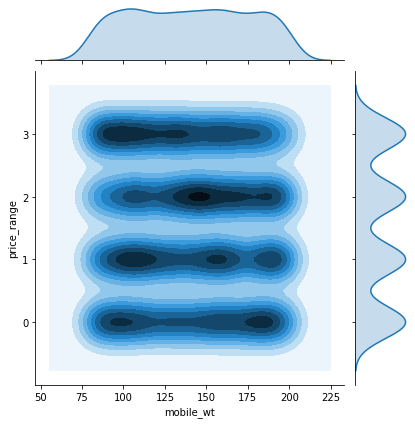

In [37]:
sns.jointplot(x='mobile_wt',y='price_range',data=dataset,kind='kde');

### Talk time vs Price range

#### Visualizing real data over categorical data
##### Distribution of  talk_time in all price ranges 

talk_time:longest time that a single battery charge will last when you are talking

mean of talk_time at price category - 0 is above 10.50, mean of talk_time at price category- 1 is 11.25, mean of talk_time at price category 2 is slightly below 11, mean of talk_time at price category 3 is approximately 11 and 95% confidence intervals are calculated using bootstrapping  



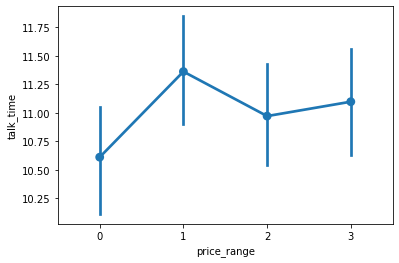

In [38]:
sns.pointplot(y="talk_time", x="price_range", data=dataset)

## Applying feature scaling


## X & Y array

In [65]:
X=dataset.drop('price_range',axis=1)

In [66]:
y=dataset['price_range']

In [81]:
X.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  
0        0             0     1  
1        1             1     0  
2        1             1     0  
3        1             0     0  
4        1             1     0

In [82]:
test.head()

id  battery_power      blue  clock_speed  dual_sim        fc  \
0 -1.730320      -0.475451  0.968496     0.312601  0.966559  2.108676   
1 -1.726856      -0.942782  0.968496    -1.255832  0.966559 -0.132927   
2 -1.723391       1.292077  0.968496     1.519087 -1.034598 -0.805408   
3 -1.719927       0.688249 -1.032529    -1.255832  0.966559  3.005317   
4 -1.716463       0.429135 -1.032529    -0.169994 -1.034598  1.436195   

     four_g  int_memory     m_dep  mobile_wt  ...  px_height  px_width  \
0 -0.974329   -1.581269 -1.487247   1.535535  ...  -0.926990  0.391912   
1  1.026347    1.509303  1.006341   1.478120  ...   0.274729 -0.871028   
2 -0.974329   -0.367116  1.362567   1.334582  ...   1.485693  0.287236   
3  1.026347   -0.477493 -0.062340  -1.249091  ...  -0.767532  1.165604   
4  1.026347    0.847037 -0.062340  -0.904602  ...   0.281662 -0.977979   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  \
0  1.229373  0.001158  0.397363  -1.653355 -1.760216           1.0 -1.014099   
1  1.614643 -1.388231 -1.254383  -0.743418  0.568112          -1.0 -1.014099   
2  0.236313  1.158982  1.105254  -0.197456 -1.760216           1.0  0.986097   
3  1.612804 -0.461972 -1.254383  -0.743418  0.568112           1.0 -1.014099   
4 -0.336535  0.695852  0.633326  -0.743418  0.568112          -1.0  0.986097   

   price_range  
0     1.317308  
1     1.317308  
2     0.436166  
3     1.317308  
4    -0.444977  

[5 rows x 22 columns]

In [45]:
tc=test.columns

In [46]:
xc=X.columns

-Standardize features by removing the mean and scaling to unit variance

In [47]:
from sklearn.preprocessing import StandardScaler
# Standardize train data
scaler = StandardScaler()
scaled1 = scaler.fit_transform(X) 
 

# Converting the numpy array into a pandas DataFrame 
X = pd.DataFrame(data=scaled1,columns=xc) 


# Standardize test data

scaled2 = scaler.fit_transform(test) 

# Converting the numpy array into a pandas DataFrame 
test = pd.DataFrame(data=scaled2,columns=tc) 



In [48]:
test.head()

id  battery_power      blue  clock_speed  dual_sim        fc  \
0 -1.730320      -0.475451  0.968496     0.312601  0.966559  2.108676   
1 -1.726856      -0.942782  0.968496    -1.255832  0.966559 -0.132927   
2 -1.723391       1.292077  0.968496     1.519087 -1.034598 -0.805408   
3 -1.719927       0.688249 -1.032529    -1.255832  0.966559  3.005317   
4 -1.716463       0.429135 -1.032529    -0.169994 -1.034598  1.436195   

     four_g  int_memory     m_dep  mobile_wt  ...        pc  px_height  \
0 -0.974329   -1.581269 -1.487247   1.535535  ...  0.976026  -0.926990   
1  1.026347    1.509303  1.006341   1.478120  ...  0.319433   0.274729   
2 -0.974329   -0.367116  1.362567   1.334582  ... -0.993754   1.485693   
3  1.026347   -0.477493 -0.062340  -1.249091  ...  1.632619  -0.767532   
4  1.026347    0.847037 -0.062340  -0.904602  ...  1.304323   0.281662   

   px_width       ram      sc_h      sc_w  talk_time   three_g  touch_screen  \
0  0.391912  1.229373  0.001158  0.397363  -1.653355 -1.760216           1.0   
1 -0.871028  1.614643 -1.388231 -1.254383  -0.743418  0.568112          -1.0   
2  0.287236  0.236313  1.158982  1.105254  -0.197456 -1.760216           1.0   
3  1.165604  1.612804 -0.461972 -1.254383  -0.743418  0.568112           1.0   
4 -0.977979 -0.336535  0.695852  0.633326  -0.743418  0.568112          -1.0   

       wifi  
0 -1.014099  
1 -1.014099  
2  0.986097  
3 -1.014099  
4  0.986097  

[5 rows x 21 columns]

In [87]:
X.head()

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.902597 -0.990050     0.830779 -1.019184 -0.762495 -1.043966   
1      -0.495139  1.010051    -1.253064  0.981177 -0.992890  0.957886   
2      -1.537686  1.010051    -1.253064  0.981177 -0.532099  0.957886   
3      -1.419319  1.010051     1.198517 -1.019184 -0.992890 -1.043966   
4       1.325906  1.010051    -0.395011 -1.019184  2.002254  0.957886   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0   -1.380644  0.340740   1.349249 -1.101971 -1.305750  -1.408949 -1.146784   
1    1.155024  0.687548  -0.120059 -0.664768 -0.645989   0.585778  1.704465   
2    0.493546  1.381165   0.134244  0.209639 -0.645989   1.392684  1.074968   
3   -1.215274  1.034357  -0.261339  0.646842 -0.151168   1.286750  1.236971   
4    0.658915  0.340740   0.021220 -1.101971  0.673534   1.268718 -0.091452   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  
0  0.391703 -0.784983  0.283103   1.462493 -1.786861     -1.006018  0.986097  
1  0.467317  1.114266 -0.635317  -0.734267  0.559641      0.994018 -1.014099  
2  0.441498 -0.310171 -0.864922  -0.368140  0.559641      0.994018 -1.014099  
3  0.594569  0.876859  0.512708  -0.002014  0.559641     -1.006018 -1.014099  
4 -0.657666 -1.022389 -0.864922   0.730240  0.559641      0.994018 -1.014099

## Splitting the data

In [49]:
from sklearn.model_selection import train_test_split

To evaluate the classifier performance data is divided into Training set and test set 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [51]:
print('X_train : ' + str(X_train.shape))
print('X_test : ' + str(X_test.shape))
print('y_train : ' + str(y_train.shape))
print('y_test : ' + str(y_test.shape))

X_train : (1340, 20)
X_test : (660, 20)
y_train : (1340,)
y_test : (660,)


# A presentation of challenger models

## Benchmark_Logistic_Regression_Model

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
#from sklearn.metrics import plot_confusion_matrix

model = LogisticRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Accuracy: The amount of correct classifications over the total amount of classifications.
#The train accuracy: The accuracy of a model on examples it was constructed on.
#The test accuracy is the accuracy of a model on examples it hasn't seen.
#Confusion matrix: A tabulation of the predicted class  against the actual class
#We use the data of the confusion matrix to compute metrics that quantify the performance of the model.

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))



Train Set Accuracy:97.83582089552239
Test Set Accuracy:94.6969696969697

Confusion Matrix:
[[153   4   0   0]
 [  5 146  13   0]
 [  0   2 176   1]
 [  0   0  10 150]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       157
           1       0.96      0.89      0.92       164
           2       0.88      0.98      0.93       179
           3       0.99      0.94      0.96       160

    accuracy                           0.95       660
   macro avg       0.95      0.95      0.95       660
weighted avg       0.95      0.95      0.95       660



In [67]:
'''The values returned by the confusion matrix are divided into the following categories:
True Positive (TP):
The model predicted positive, and the real value is positive.
True Negative (TN):
The model predicted negative, and the real value is negative.
False Positive (FP):
The model predicted positive, but the real value is negative (Type I error).
False Negative (FN):
The model predicted negative, but the real value is positive (Type II error).'''

'The values returned by the confusion matrix are divided into the following categories:\nTrue Positive (TP):\nThe model predicted positive, and the real value is positive.\nTrue Negative (TN):\nThe model predicted negative, and the real value is negative.\nFalse Positive (FP):\nThe model predicted positive, but the real value is negative (Type I error).\nFalse Negative (FN):\nThe model predicted negative, but the real value is positive (Type II error).'

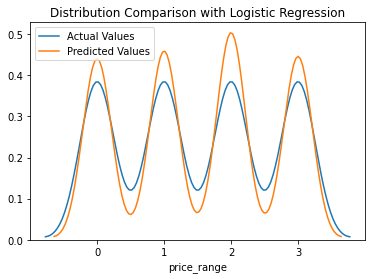

In [53]:

y_test_pred = model.predict(X_test)
actual_value = y
## Comparison of distributions in Train data

sns.distplot(actual_value, hist=False, label="Actual Values")
sns.distplot(y_test_pred, hist=False, label="Predicted Values")
plt.title('Distribution Comparison with Logistic Regression')
plt.show()

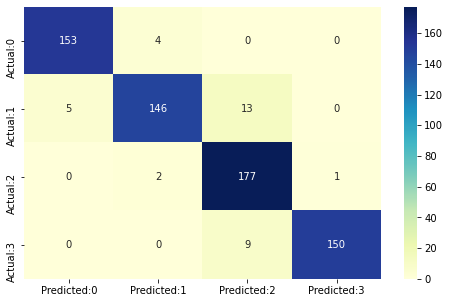

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_pred,y_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3'],index=['Actual:0','Actual:1','Actual:2','Actual:3'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
#The rows of the matrix represent the real classes, while the columns represent the predicted classes.
#The diagonal from the top left to the bottom right contains the observations correctly predicted.

Since, in this multiclass case,the parameter- ‘multi_class’ option was not set to ‘ovr’, we use and require that a classifier that is to be used for binary classification be provided to the OneVsRestClassifier as an argument. 

 OneVsRestClassifier - for multiclass classification and its strategy consists of fitting one classifier per class. For each classifier, the class is fitted against all the other classes. (it means that problem of multiclass classification is broken down to multiple binary classification problems).

In [70]:
%%time 

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.8318181818181818
Wall time: 457 ms


In [55]:
x_test_clf_pred = clf.predict(X_test)
confusion_matrix(y_test, x_test_clf_pred)

array([[156,   2,   0,   0],
       [ 15, 119,  18,   0],
       [  0,  47, 124,  28],
       [  0,   0,   1, 150]], dtype=int64)

In [56]:
print(classification_report(y_test, x_test_clf_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       158
           1       0.71      0.78      0.74       152
           2       0.87      0.62      0.73       199
           3       0.84      0.99      0.91       151

    accuracy                           0.83       660
   macro avg       0.83      0.85      0.83       660
weighted avg       0.84      0.83      0.83       660



## Criteria

## - A presentation of the criteria chosen to select a model over another

We can see from Train Set accuracy and Test Set accuracy scores(97 and 94 >90%) that there is no overfitting

Metrics for the evaluation of a classification model:

**Accuracy**:

The accuracy returns the proportion of correct predictions.
Accuracy = (TP + TN)/(TP + TN + FP + FN) 

**Precision**:

The precision returns the proportion of true positives among all the values predicted as positive.
Precision = TP/(TP + FP)

**Recall**: Sensitivity or True Positive Rate

The recall returns the proportion of positive values correctly predicted.
Recall = TP/(TP + FN)

**F1-score**:

The f1-score is the harmonic mean of precision and recall.
F1-score = (2 x Precision x Recall)/(Precision + Recall)

**Support**: number of observations for each class

**Macro average**:
the arithmetic average of a metric between the 4 classes.

**Weighted average**:

the weighted average is calculated by dividing sum(metric of interest x weight) by sum(weights).
Here the weights are the number of observation for each class.

#### The model correctly predicted 97% the observations of class 0, so both precision and recall are 0.97, and the F1-score is 0.97.
#### For class 2, the recall is higher than precision, which means that there are fewer FN than FP
#### For class 1 and 3, precision is higher than recall, which means that there are more FN than FP

#### We know that no metric is good enough to evaluate all classification problems, but that each metric is the best choice in specific circumstances. We use Accuracy for evaluating a classification model because of its extensive use when there is Class balance.(however, it can be misleading when the classes are unbalanced.)





### Among all the classifiers we choose Logistic Regression Model as it has the highest accuracy.

## predict the price range in test data

In [32]:
test.head()

id  battery_power      blue  clock_speed  dual_sim        fc  \
0 -1.730320      -0.475451  0.968496     0.312601  0.966559  2.108676   
1 -1.726856      -0.942782  0.968496    -1.255832  0.966559 -0.132927   
2 -1.723391       1.292077  0.968496     1.519087 -1.034598 -0.805408   
3 -1.719927       0.688249 -1.032529    -1.255832  0.966559  3.005317   
4 -1.716463       0.429135 -1.032529    -0.169994 -1.034598  1.436195   

     four_g  int_memory     m_dep  mobile_wt  ...        pc  px_height  \
0 -0.974329   -1.581269 -1.487247   1.535535  ...  0.976026  -0.926990   
1  1.026347    1.509303  1.006341   1.478120  ...  0.319433   0.274729   
2 -0.974329   -0.367116  1.362567   1.334582  ... -0.993754   1.485693   
3  1.026347   -0.477493 -0.062340  -1.249091  ...  1.632619  -0.767532   
4  1.026347    0.847037 -0.062340  -0.904602  ...  1.304323   0.281662   

   px_width       ram      sc_h      sc_w  talk_time   three_g  touch_screen  \
0  0.391912  1.229373  0.001158  0.397363  -1.653355 -1.760216           1.0   
1 -0.871028  1.614643 -1.388231 -1.254383  -0.743418  0.568112          -1.0   
2  0.287236  0.236313  1.158982  1.105254  -0.197456 -1.760216           1.0   
3  1.165604  1.612804 -0.461972 -1.254383  -0.743418  0.568112           1.0   
4 -0.977979 -0.336535  0.695852  0.633326  -0.743418  0.568112          -1.0   

       wifi  
0 -1.014099  
1 -1.014099  
2  0.986097  
3 -1.014099  
4  0.986097  

[5 rows x 21 columns]

In [33]:
x2 = test.drop('id', axis=1)

In [34]:
x2.head()

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.475451  0.968496     0.312601  0.966559  2.108676 -0.974329   
1      -0.942782  0.968496    -1.255832  0.966559 -0.132927  1.026347   
2       1.292077  0.968496     1.519087 -1.034598 -0.805408 -0.974329   
3       0.688249 -1.032529    -1.255832  0.966559  3.005317  1.026347   
4       0.429135 -1.032529    -0.169994 -1.034598  1.436195  1.026347   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0   -1.581269 -1.487247   1.535535 -0.580671  0.976026  -0.926990  0.391912   
1    1.509303  1.006341   1.478120  0.293833  0.319433   0.274729 -0.871028   
2   -0.367116  1.362567   1.334582 -0.580671 -0.993754   1.485693  0.287236   
3   -0.477493 -0.062340  -1.249091  1.605590  1.632619  -0.767532  1.165604   
4    0.847037 -0.062340  -0.904602  0.731085  1.304323   0.281662 -0.977979   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  
0  1.229373  0.001158  0.397363  -1.653355 -1.760216           1.0 -1.014099  
1  1.614643 -1.388231 -1.254383  -0.743418  0.568112          -1.0 -1.014099  
2  0.236313  1.158982  1.105254  -0.197456 -1.760216           1.0  0.986097  
3  1.612804 -0.461972 -1.254383  -0.743418  0.568112           1.0 -1.014099  
4 -0.336535  0.695852  0.633326  -0.743418  0.568112          -1.0  0.986097

In [35]:
predicted_test_value = model.predict(x2)
pd.value_counts(predicted_test_value) #we have value count on every unique value on predicted test price range

0    261
3    258
2    250
1    231
dtype: int64

##### This is almost evenly distributed, but the phone with a very low cost  is dominating over the others. By specifying economic range a good product can be suggested to a costumer.

####  To achieve maximum accuracy and predict more accurate, more and more instances should be added to the data set. And selecting more appropriate features can also increase the accuracy. So dataset should be large and more appropriate features should be selected to achieve higher accuracy. 

### Adding Predicted price to test.csv

In [36]:
test['price_range']=predicted_test_value

# KNN

One way to  find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

we plot the mean error for the predicted values of test set for all the K values between 1 and 20.

To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 20.

In [71]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

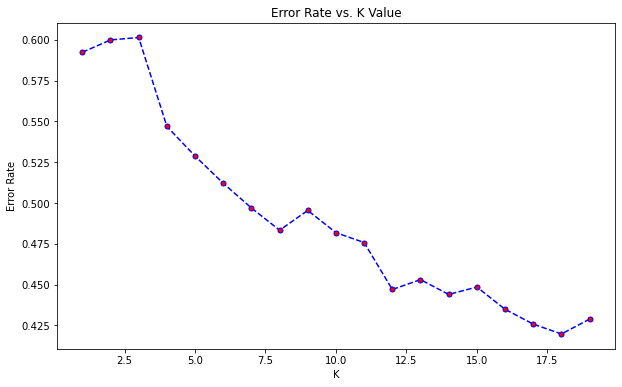

In [72]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# we choose k=18 because it has the lowest error rate

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=18)

In [74]:
knn.score(X_test,y_test)

0.5803030303030303

In [63]:
pred = knn.predict(X_test)

In [64]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       158
           1       0.41      0.57      0.48       152
           2       0.60      0.38      0.46       199
           3       0.73      0.72      0.73       151

    accuracy                           0.58       660
   macro avg       0.60      0.60      0.59       660
weighted avg       0.60      0.58      0.58       660



The reason for KNN poor performance might be also presence of blue,dual_sim,four_g,talk_time,three_g,touch_screen,wifi features which are categorical and the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

In [27]:
#for comparison of accuracy scores
model_pred = model.predict(X) #logistic
knn_pred = knn.predict(X)     #knn

models_correlation = np.corrcoef(model_pred, knn_pred)
models_correlation[0,1]

0.8232706250020538

### a dimension reduction algorithm - PCA was applied alternatively to identify its utility for classification problem.
#### The classification accuracy is lower than the case without PCA implementation, which showcases the fact that we lose the feature that actually provides the ability to classify the data.

## PCA

In [39]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [40]:
pca = PCA()
pca.fit(scale(dataset[dataset.columns[:20]])) 
# it is necessary to normalize data before performing PCA. 
#The PCA calculates a new projection of data set. And the new axis are based on the standard deviation of variables.

PCA()

In [41]:
print(pca.explained_variance_) #parameter returns a vector of the variance explained by each dimension.
print(pca.explained_variance_ratio_)


[1.67809669 1.62330659 1.58336253 1.42975987 1.12207212 1.08768022
 1.06617731 1.02092877 1.0175506  1.00618845 0.9812144  0.97531969
 0.95271479 0.95212529 0.89928323 0.87655734 0.50105488 0.47253596
 0.41304483 0.35103144]
[0.08386288 0.08112475 0.07912854 0.07145225 0.05607555 0.05435682
 0.05328221 0.05102092 0.05085209 0.05028427 0.04903619 0.0487416
 0.04761192 0.04758246 0.04494168 0.04380595 0.02504022 0.02361498
 0.02064192 0.0175428 ]


### Visuals

In [42]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(20)], 
        "explained_variance" : pca.explained_variance_,
        "% explained_variance" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. explained" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "explained_variance", "% explained_variance", "% cum. var. explained"]
)

Text(0.5, 0.98, 'explained variance by dim')

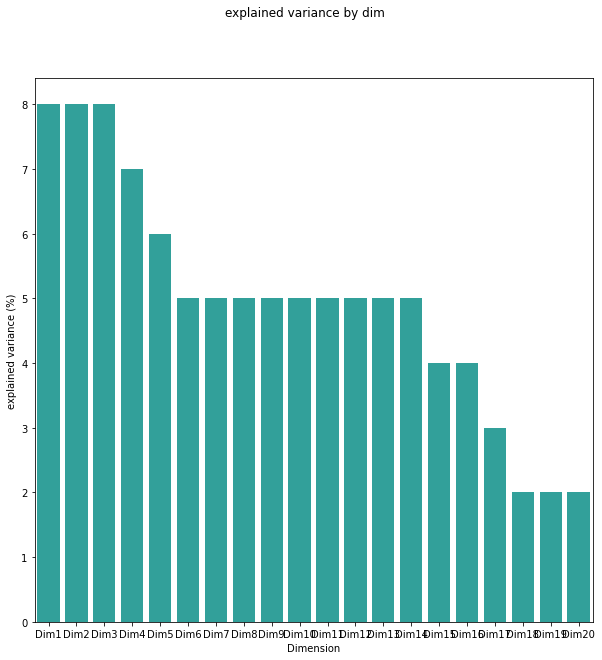

In [43]:
plt.figure(figsize=(10,10))

g_eig = sns.barplot(x = "Dimension", 
                y = "% explained_variance",
                palette = ["lightseagreen"],
                data = eig)
g_eig.set(ylabel = "explained variance (%)")
g_eig.figure.suptitle("explained variance by dim")



In [44]:
dataset_pca = pca.transform(dataset[dataset.columns[:20]])

dataset_pca_df = pd.DataFrame({
    "Dim1" : dataset_pca[:,0], 
    "Dim2" : dataset_pca[:,1],
    "Dim3" : dataset_pca[:,2],
    "Price_Range" : dataset.price_range
})

dataset_pca_df.head() ## transformed the original dataset into the one with 3 features only

Dim1        Dim2         Dim3  Price_Range
0  -21.598168  255.596092   398.150878            1
1 -348.048492  443.836189  1458.101646            2
2 -396.081390  426.138947  1517.124060            2
3 -394.285273  444.224888  1531.707108            2
4 -212.851802  349.525023  1204.245565            1

In [45]:
X=dataset_pca_df.drop('Price_Range',axis=1)
y=dataset_pca_df['Price_Range']

In [46]:
#from sklearn.preprocessing import StandardScaler
xc=X.columns
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=xc)
X.head()

Dim1      Dim2      Dim3
0  1.206246 -0.887047 -1.447204
1 -1.387470  1.170561  1.315197
2 -1.769101  0.977116  1.469019
3 -1.754831  1.174809  1.507025
4 -0.313304  0.139668  0.653608

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

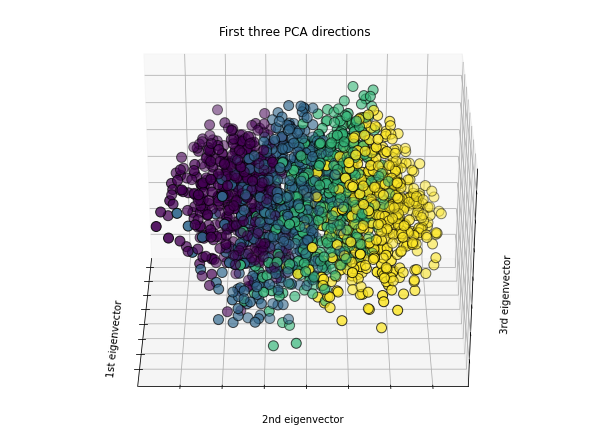

In [48]:
fig = plt.figure(2, figsize=(8, 6))
ax2 = Axes3D(fig, elev=-150, azim=180)
X_reduced = PCA(n_components=3).fit_transform(X)
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, edgecolor='k', s=100)
ax2.set_title("First three PCA directions")
ax2.set_xlabel("1st eigenvector")
ax2.w_xaxis.set_ticklabels([])
ax2.set_ylabel("2nd eigenvector")
ax2.w_yaxis.set_ticklabels([])
ax2.set_zlabel("3rd eigenvector")
ax2.w_zaxis.set_ticklabels([])

plt.show()


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Logistic Regression

In [50]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix,classification_report
#from sklearn.metrics import plot_confusion_matrix

model = LogisticRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))



Train Set Accuracy:91.14285714285715
Test Set Accuracy:90.5

Confusion Matrix:
[[138  10   0   0]
 [  6 123  14   0]
 [  0   8 154   9]
 [  0   0  10 128]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       148
           1       0.87      0.86      0.87       143
           2       0.87      0.90      0.88       171
           3       0.93      0.93      0.93       138

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600

